In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils.text_processor import *
from utils.analysis import *
from pathlib import Path
import pandas as pd


In [3]:
china_df = pd.read_csv(str(Path.cwd())+ '/data/China_df.csv')
hk_df = pd.read_csv(str(Path.cwd())+ '/data/HongKong_df.csv')
taiwan_df = pd.read_csv(str(Path.cwd()) + '/data/taiwan_df.csv')


In [4]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\limyi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\limyi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
  # Check if posts is indeed a DataFrame
def process_column(posts, include_selftext = False):
    if not isinstance(posts, pd.DataFrame):
      raise ValueError("Input `posts` should be a pandas DataFrame.")
    texts = posts['title'].apply(preprocess_text)
    if include_selftext:
      # Add 'selftext' to each text if requested
      texts += ' ' + posts['selftext'].apply(preprocess_text)

    # Convert texts to a list format for further analysis
    texts = texts.tolist()
    return texts

def top_n_terms(tfidf_matrix, feature_names, top_n=None):
    mean_tfidf = tfidf_matrix.mean(axis=0).tolist()[0]

    tfidf_scores = list(zip(feature_names, mean_tfidf))

    tfidf_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

    return tfidf_scores[:top_n]

In [6]:
china_text = process_column(china_df)
ch_tfidf_matrix, chi_feature_names = generate_tfidf_matrix(china_text)
china_terms = top_n_terms(ch_tfidf_matrix, chi_feature_names)
china_terms

[('china', 0.08295822615324795),
 ('chinese', 0.04866368192052346),
 ('get', 0.013412208287522012),
 ('help', 0.011992172339932265),
 ('shanghai', 0.011329960305409309),
 ('day', 0.011228693826318333),
 ('beijing', 0.011134464042319797),
 ('travel', 0.011013041649673243),
 ('taiwan', 0.010870771018992554),
 ('use', 0.010374359897406876),
 ('like', 0.009043880322750218),
 ('people', 0.00867895033355779),
 ('look', 0.00867801782280133),
 ('make', 0.008628490073759203),
 ('need', 0.008601501808617122),
 ('year', 0.008167774378063687),
 ('work', 0.007749515295565342),
 ('national', 0.007699165457617498),
 ('say', 0.007634210632298543),
 ('visit', 0.007564214563050564),
 ('advice', 0.0075522364173746465),
 ('trip', 0.0075423832973734286),
 ('anyone', 0.007493533835002049),
 ('visa', 0.007468730007453572),
 ('city', 0.0074511998433659035),
 ('find', 0.007410559798977123),
 ('know', 0.007268053444252757),
 ('halloween', 0.0072220918718487355),
 ('time', 0.007117335187099523),
 ('think', 0.006

In [7]:
taiwan_text = process_column(taiwan_df)
tw_tfidf_matrix, tw_feature_names = generate_tfidf_matrix(taiwan_text)
tw_terms = top_n_terms(tw_tfidf_matrix, tw_feature_names)
tw_terms

[('taiwan', 0.07909476366173172),
 ('taipei', 0.04919195029122856),
 ('typhoon', 0.02137433427463712),
 ('day', 0.019041404776242277),
 ('taiwanese', 0.0187766431170846),
 ('travel', 0.015376957628934937),
 ('question', 0.015113667371376524),
 ('kaohsiung', 0.014292777143940031),
 ('look', 0.014115409063640273),
 ('best', 0.012570803594186095),
 ('buy', 0.012096145252704752),
 ('get', 0.011649297870376463),
 ('people', 0.011117246624430869),
 ('time', 0.010924645872411869),
 ('chinese', 0.010015071104407903),
 ('national', 0.008797256815295713),
 ('help', 0.00834023746164619),
 ('store', 0.007921016207507094),
 ('advice', 0.007847432921955012),
 ('taichung', 0.007740719700427608),
 ('find', 0.007703807487720574),
 ('place', 0.007602364276277966),
 ('trip', 0.007599857136428715),
 ('mandarin', 0.007130236608671361),
 ('visit', 0.007102006972564673),
 ('tourist', 0.0070201902479828686),
 ('need', 0.006890922719885966),
 ('around', 0.00675942807059954),
 ('good', 0.006737867067446891),
 (

In [8]:
len(tw_terms)

643

In [9]:
hk_text = process_column(hk_df)
hk_tfidf_matrix, hk_feature_names = generate_tfidf_matrix(hk_text)
hk_terms = top_n_terms(hk_tfidf_matrix, hk_feature_names)
hk_terms

[('hong', 0.06311179283108062),
 ('kong', 0.06297899633138287),
 ('buy', 0.015686915705689985),
 ('look', 0.012949128114062786),
 ('get', 0.012908938640706656),
 ('anyone', 0.012719686929955447),
 ('recommendation', 0.01191401506743255),
 ('best', 0.011377767015773936),
 ('question', 0.0113480099500929),
 ('store', 0.01125896424914886),
 ('help', 0.010131773468044404),
 ('hongkong', 0.0100068625096673),
 ('find', 0.0099925665633246),
 ('year', 0.009918992070324482),
 ('travel', 0.00987806854343873),
 ('day', 0.009753726000206792),
 ('china', 0.009733711754171237),
 ('place', 0.00886634253252169),
 ('know', 0.008576981176965164),
 ('move', 0.008312874511134036),
 ('work', 0.00746828695313587),
 ('good', 0.007373285127446822),
 ('card', 0.007113461496328558),
 ('use', 0.007015901044446319),
 ('time', 0.007011099564475562),
 ('people', 0.006998198687701136),
 ('layover', 0.0068084476728962175),
 ('say', 0.006803166208907845),
 ('new', 0.006656576518289375),
 ('city', 0.006585317730055482)

In [10]:
hk_tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

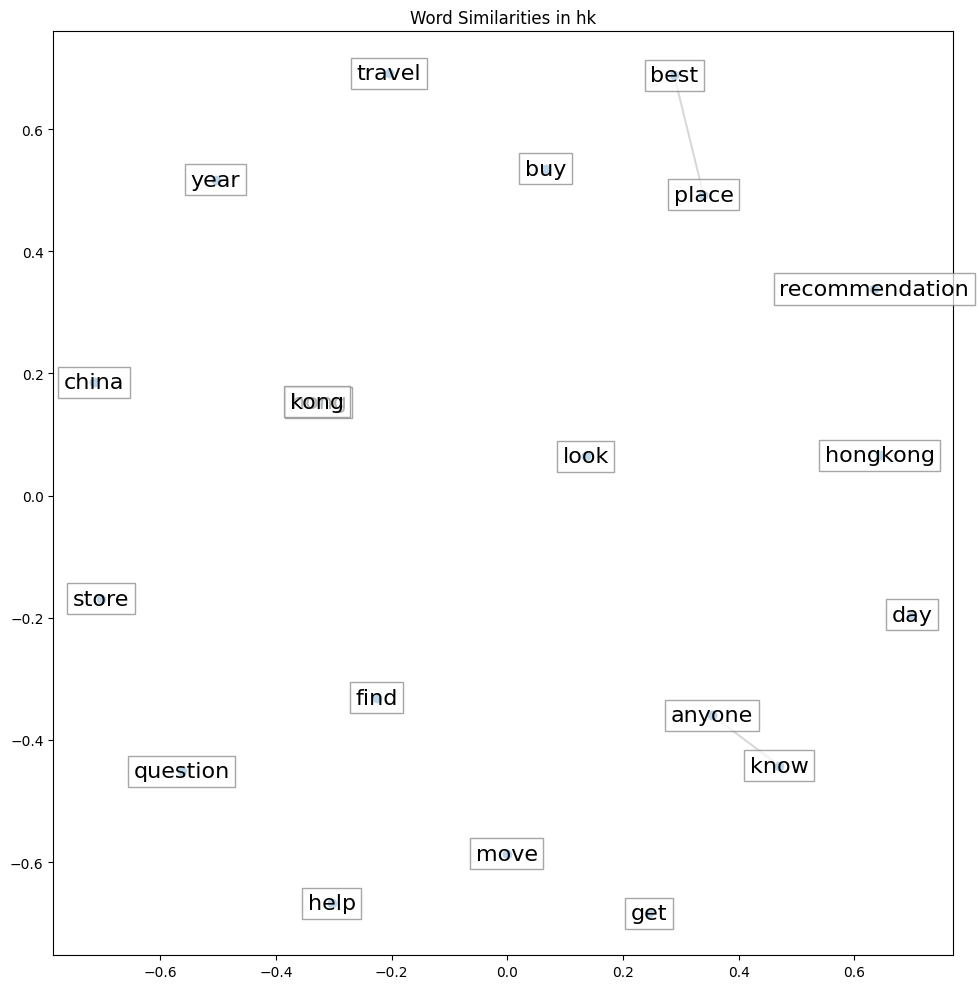

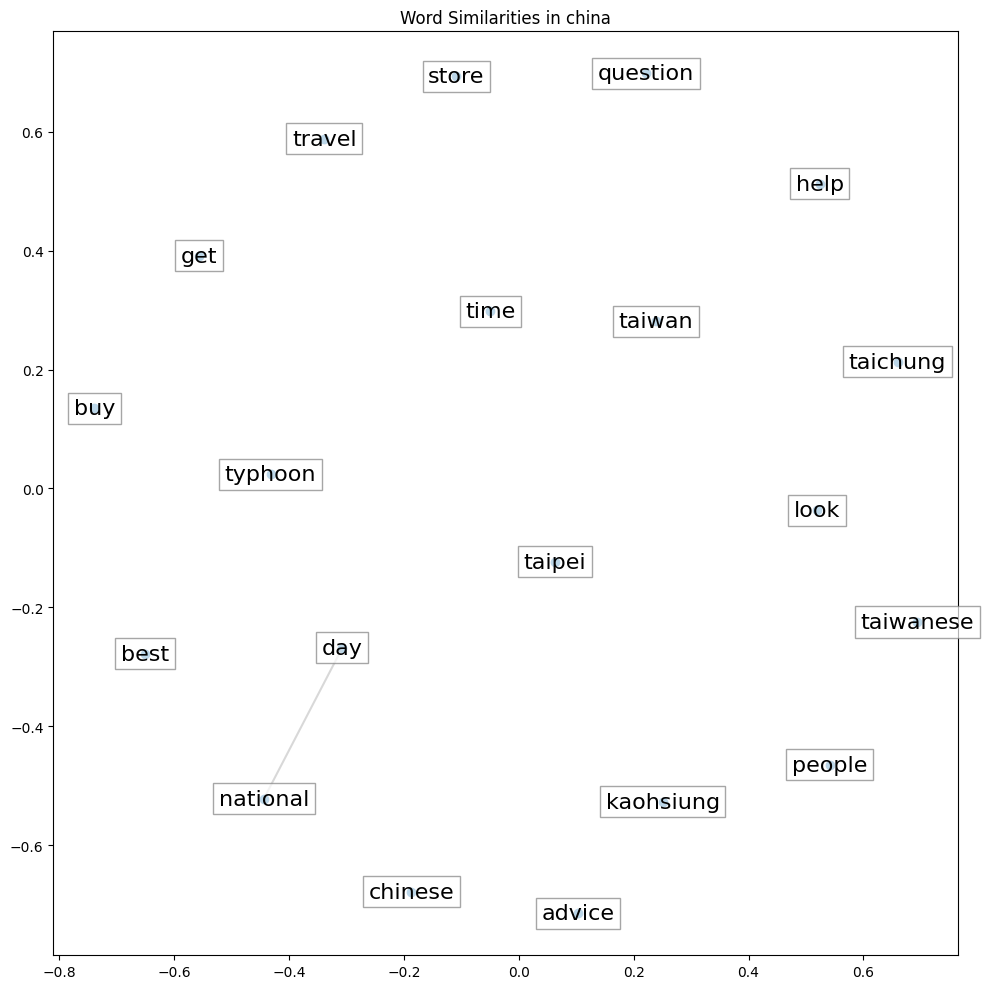

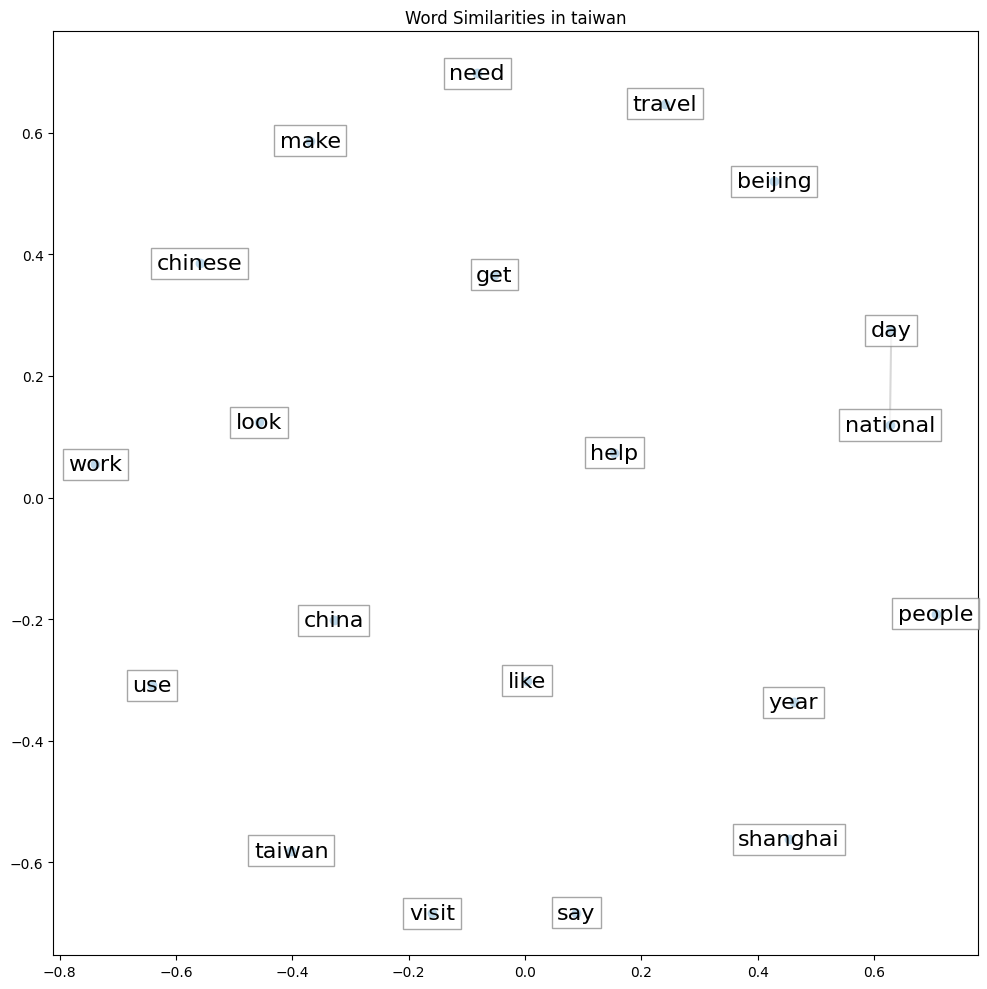

In [11]:
subs_of_interest  =  { 'hk': (hk_tfidf_matrix, hk_feature_names ),
                      'china': (tw_tfidf_matrix, tw_feature_names),
                      'taiwan':(ch_tfidf_matrix, chi_feature_names)
                      

}
for sub, value  in subs_of_interest.items():
    fig, ax = plot_word_similarities_mds(value[0], 
                                     value[-1],
                                     n_terms=20, # Try changing this value
                                     title=sub)
    plt.show();


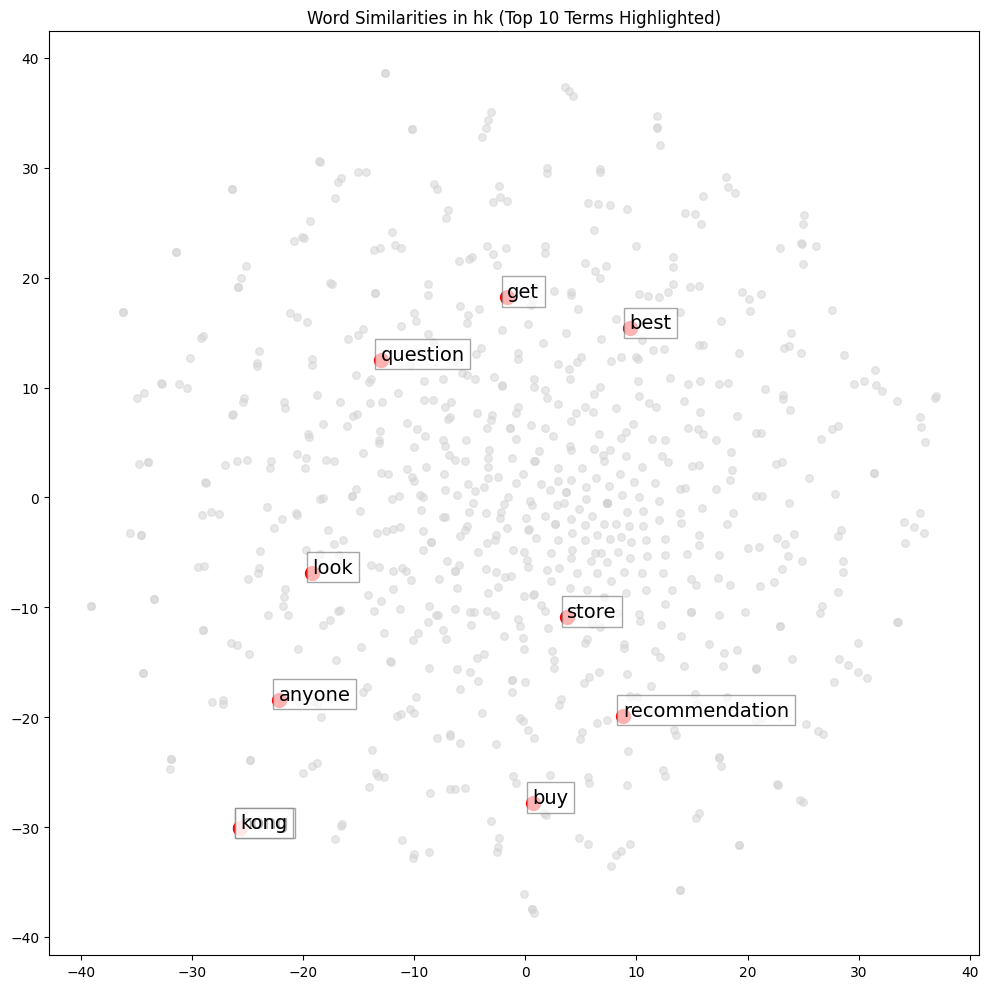

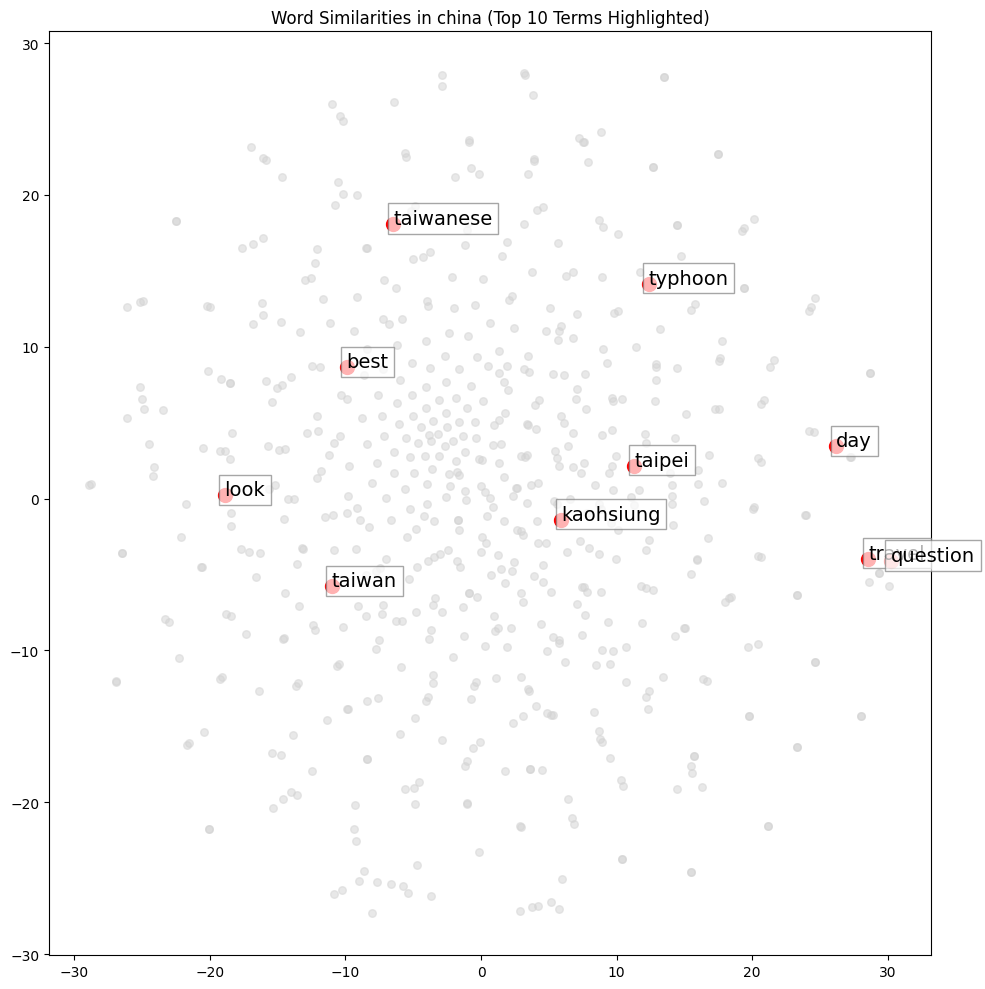

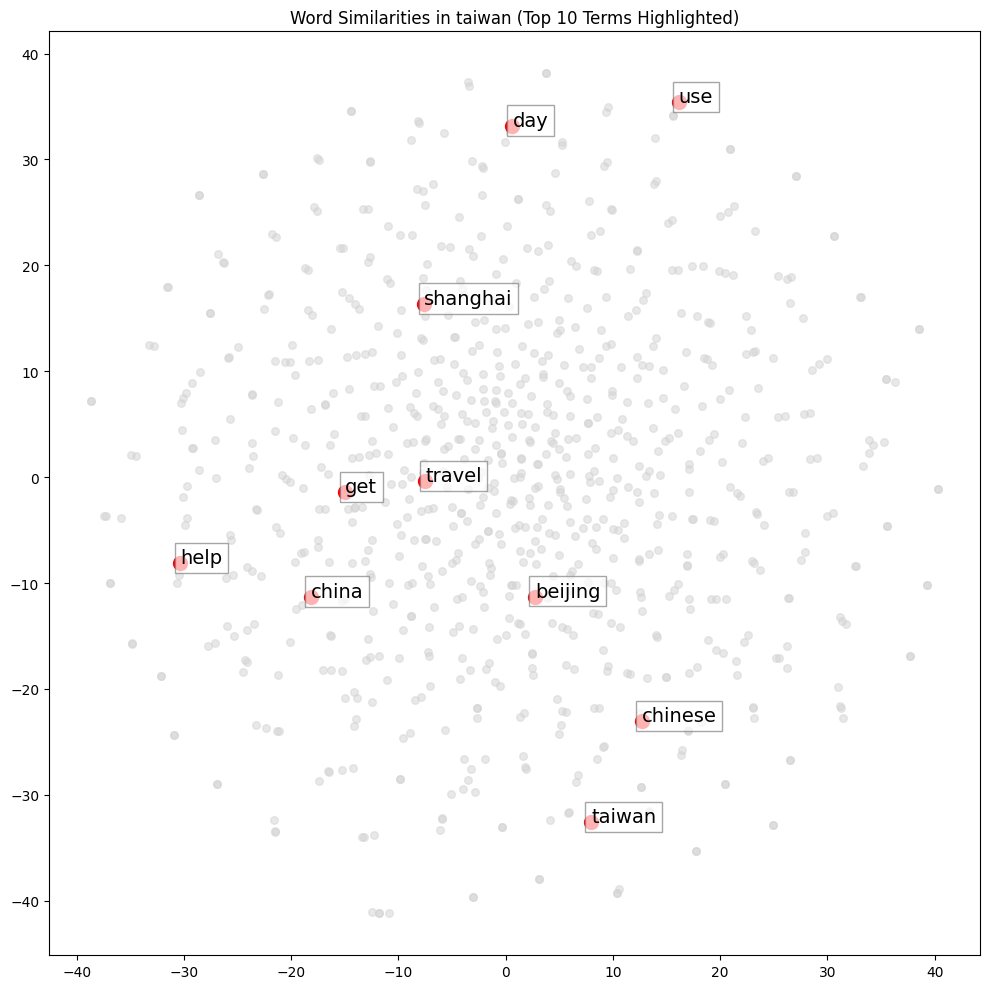

In [12]:
for sub, value  in subs_of_interest.items():
    fig, ax = plot_word_similarities_tsne(value[0], 
                                     value[-1],
                                     n_highlight=10, # Try changing this value
                                     title=sub)
    plt.show();

In [14]:
# # joy's tfidf
china_tfidf_df = pd.read_csv(str(Path.cwd())+ '/data/China_tfidf.csv', encoding='utf-8')
china_tfidf_df['country'] = 'china'
hk_tfidf_df = pd.read_csv(str(Path.cwd())+ '/data/HongKong_tfidf.csv', encoding='utf-8')
hk_tfidf_df['country'] = 'hk'
taiwan_tfidf_df = pd.read_csv(str(Path.cwd())+ '/data/taiwan_tfidf.csv', encoding='utf-8')
taiwan_tfidf_df['country'] = 'taiwan'

taiwan_tfidf_df.head()

,term,score,country
0,taiwan,0.078161,taiwan
1,taipei,0.047935,taiwan
2,taiwanese,0.020229,taiwan
3,typhoon,0.019861,taiwan
4,day,0.019108,taiwan


In [15]:
merged_tfidf_df = pd.concat([china_tfidf_df, hk_tfidf_df, taiwan_tfidf_df], axis=0)

In [16]:
merged_tfidf_df.columns

Index(['term', 'score', 'country'], dtype='object')

In [17]:
def filter_terms(df, term1, term2):
    # Filter for only "migrant" and "immigrant" terms
    df_filtered = df[df["term"].isin([term1, term2])]

    # Pivot to make each document a row and each term a column
    tfidf_pivot = df_filtered.pivot(index="country", columns="term", values="score")

    # Fill NaN values with 0, in case any document lacks one of the terms
    tfidf_pivot = tfidf_pivot.fillna(0)

    # Convert each document row into a dictionary entry with a NumPy array
    vectors = {
        doc: np.array(tfidf_pivot.loc[doc].values)
        for doc in tfidf_pivot.index
    }
    return vectors    

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_subreddit_term_space(vectors, term1, term2, title=None):
    """
    Plot subreddit vectors in a 2D term space.
    
    Parameters:
    - vectors: dict with subreddit names as keys and np.arrays as values
    - term1: string name of first term (x-axis)
    - term2: string name of second term (y-axis)
    - title: optional custom title
    """
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    
    # Plot vectors from origin
    colors = ['blue', 'green', 'red']
    for (name, vec), color in zip(vectors.items(), colors):
        plt.quiver(0, 0, vec[0], vec[1], angles='xy', scale_units='xy', scale=1,
                  color=color, label=name, width=0.008)
    
    # Style the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    # Fix: stack all vectors and find max value
    all_values = np.concatenate([v for v in vectors.values()])
    max_val = np.max(all_values) * 1.2
    plt.xlim(0, max_val)
    plt.ylim(0, max_val)
    ax.set_aspect('equal')
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # Labels
    plt.xlabel(f"'{term1}' TF-IDF score")
    plt.ylabel(f"'{term2}' TF-IDF score")
    plt.title(title or f"Subreddit Vectors in {term1}-{term2} Space")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
def report_distances(vectors):
    """
    Report the distances between subreddit vectors.
    
    Parameters:
    - vectors: dict with subreddit names as keys and np.arrays as values
    """
    for name1, vec1 in vectors.items():
        for name2, vec2 in vectors.items():
            if name1 < name2:
                dist = np.linalg.norm(vec1 - vec2)
                print(f"Distance between {name1} and {name2}: {dist:.6f}")
                
    # Print angles between vectors
    print("\nAngles between subreddit vectors:")
    for name1, vec1 in vectors.items():
        for name2, vec2 in vectors.items():
            if name1 < name2:  # avoid duplicate comparisons
                cos_sim = np.dot(vec1, vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))
                angle = np.degrees(np.arccos(cos_sim))
                print(f"{name1} vs {name2}: {angle:.1f}°")

In [19]:
def comparison(term1, term2):
    vectors = filter_terms(merged_tfidf_df, term1, term2)
    plot_subreddit_term_space(vectors, term1, term2)
    report_distances(vectors)


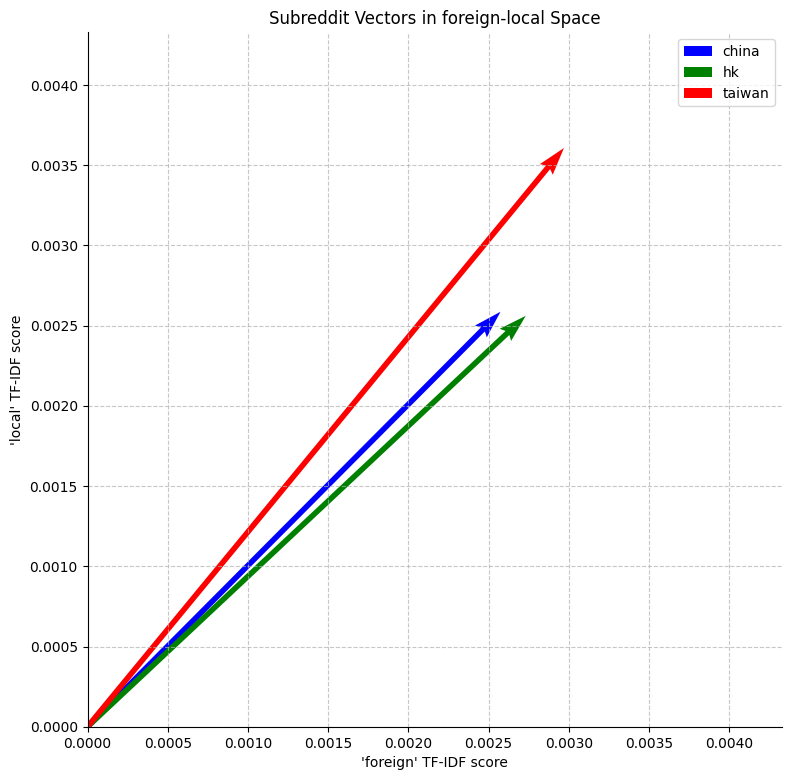

Distance between china and hk: 0.000159
Distance between china and taiwan: 0.001095
Distance between hk and taiwan: 0.001073

Angles between subreddit vectors:
china vs hk: 2.0°
china vs taiwan: 5.4°
hk vs taiwan: 7.4°


In [20]:
comparison('foreign', 'local')

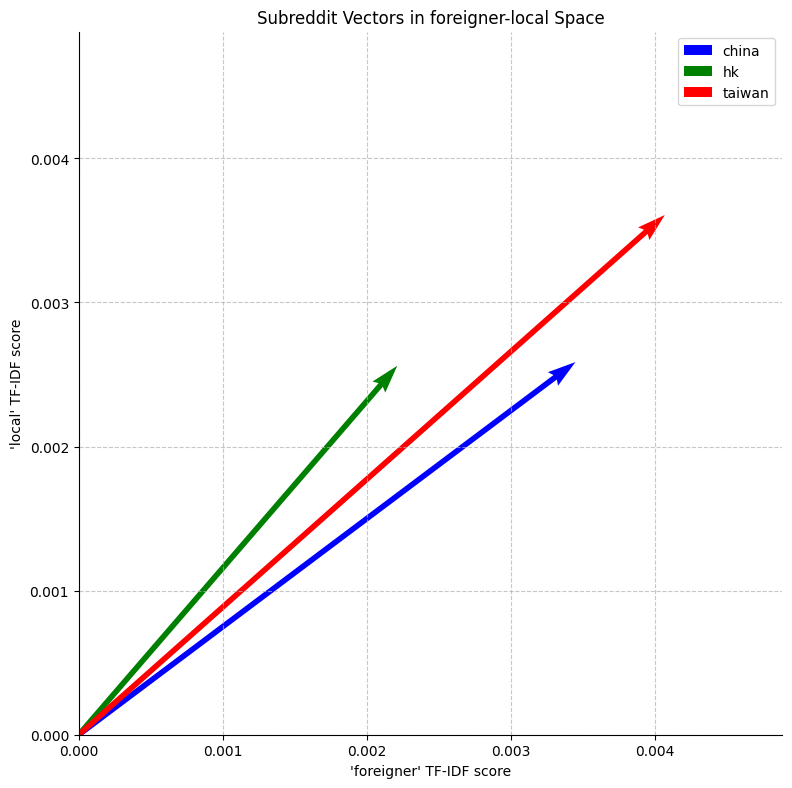

Distance between china and hk: 0.001237
Distance between china and taiwan: 0.001194
Distance between hk and taiwan: 0.002131

Angles between subreddit vectors:
china vs hk: 12.3°
china vs taiwan: 4.7°
hk vs taiwan: 7.6°


In [21]:
comparison('foreigner', 'local')

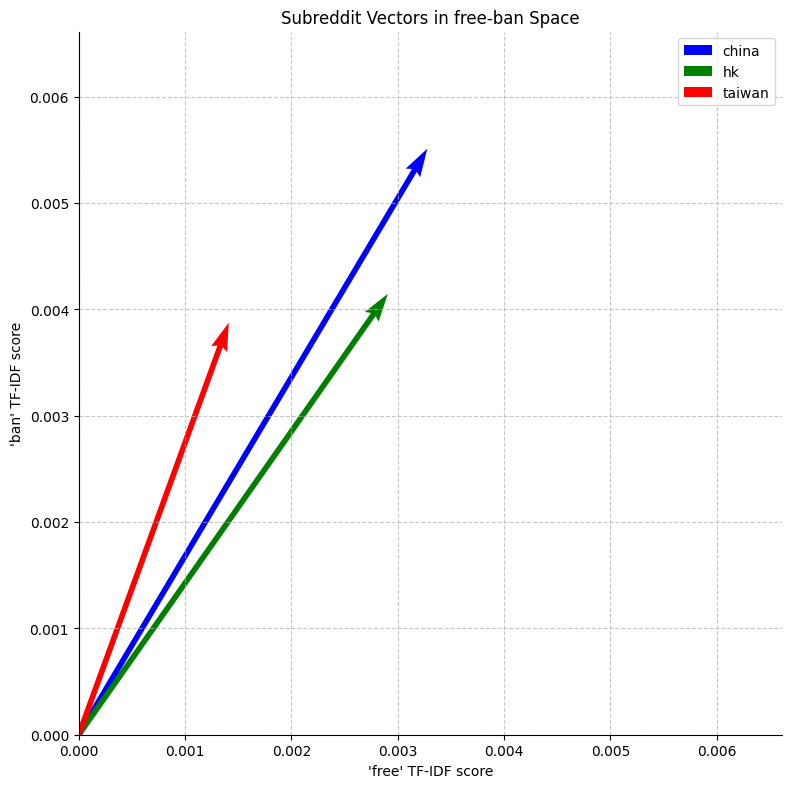

Distance between china and hk: 0.001414
Distance between china and taiwan: 0.002482
Distance between hk and taiwan: 0.001520

Angles between subreddit vectors:
china vs hk: 4.3°
china vs taiwan: 10.7°
hk vs taiwan: 15.0°


In [22]:
comparison('free', 'ban')

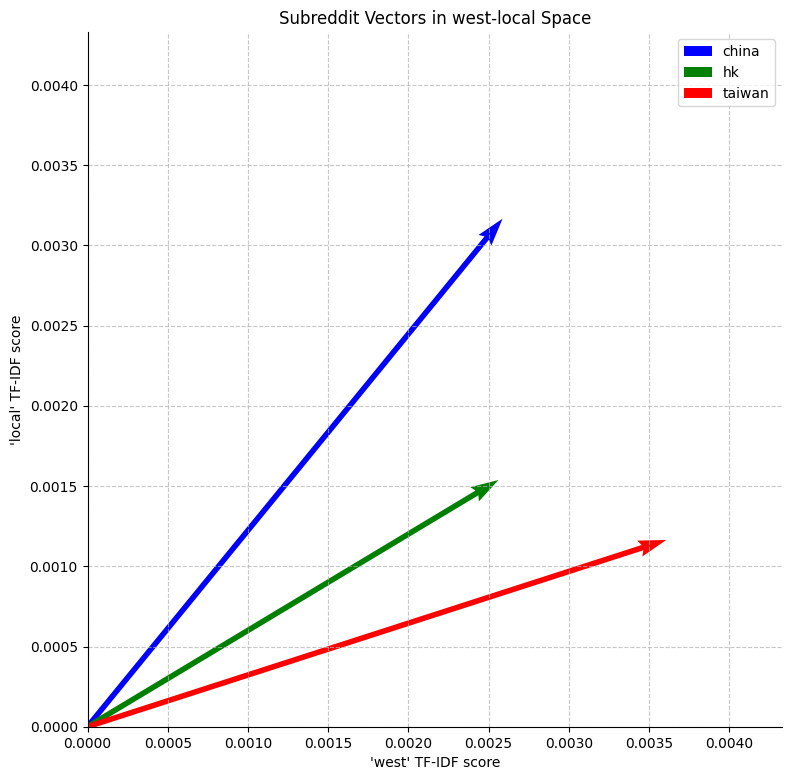

Distance between china and hk: 0.001629
Distance between china and taiwan: 0.002247
Distance between hk and taiwan: 0.001111

Angles between subreddit vectors:
china vs hk: 19.8°
china vs taiwan: 32.9°
hk vs taiwan: 13.1°


In [23]:
comparison('west', 'local')

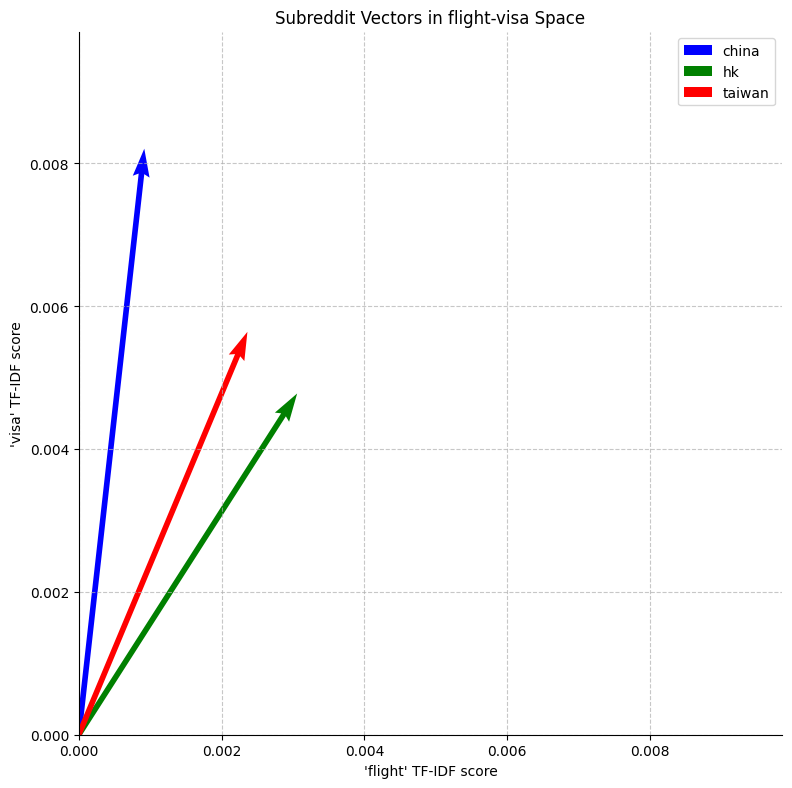

Distance between china and hk: 0.004042
Distance between china and taiwan: 0.002944
Distance between hk and taiwan: 0.001109

Angles between subreddit vectors:
china vs hk: 26.2°
china vs taiwan: 16.3°
hk vs taiwan: 9.9°


In [24]:
comparison('flight', 'visa')

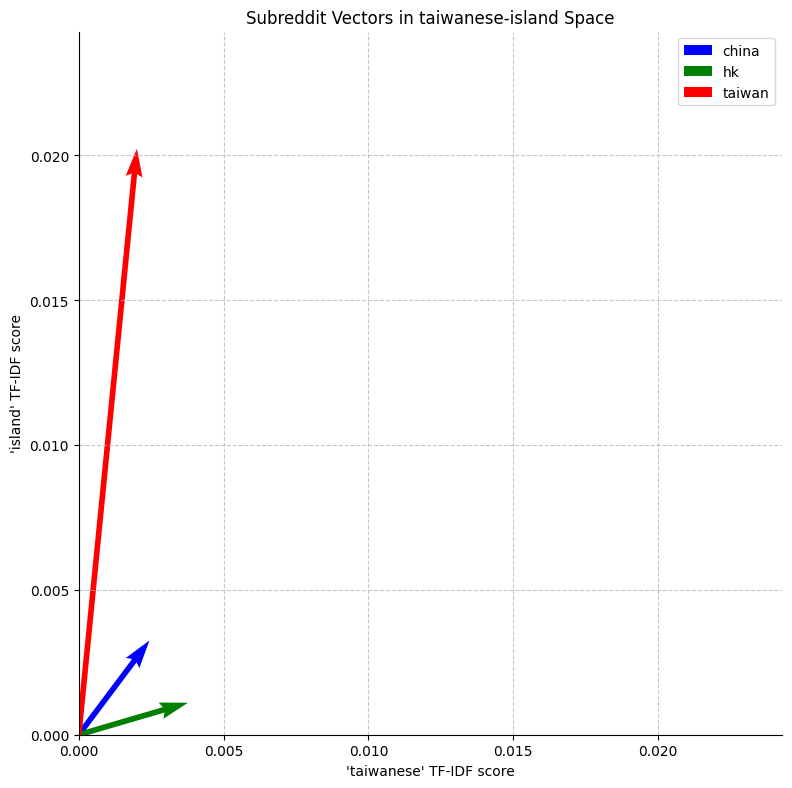

Distance between china and hk: 0.002527
Distance between china and taiwan: 0.016980
Distance between hk and taiwan: 0.019206

Angles between subreddit vectors:
china vs hk: 36.8°
china vs taiwan: 31.2°
hk vs taiwan: 68.0°


In [25]:
comparison('taiwanese', 'island')

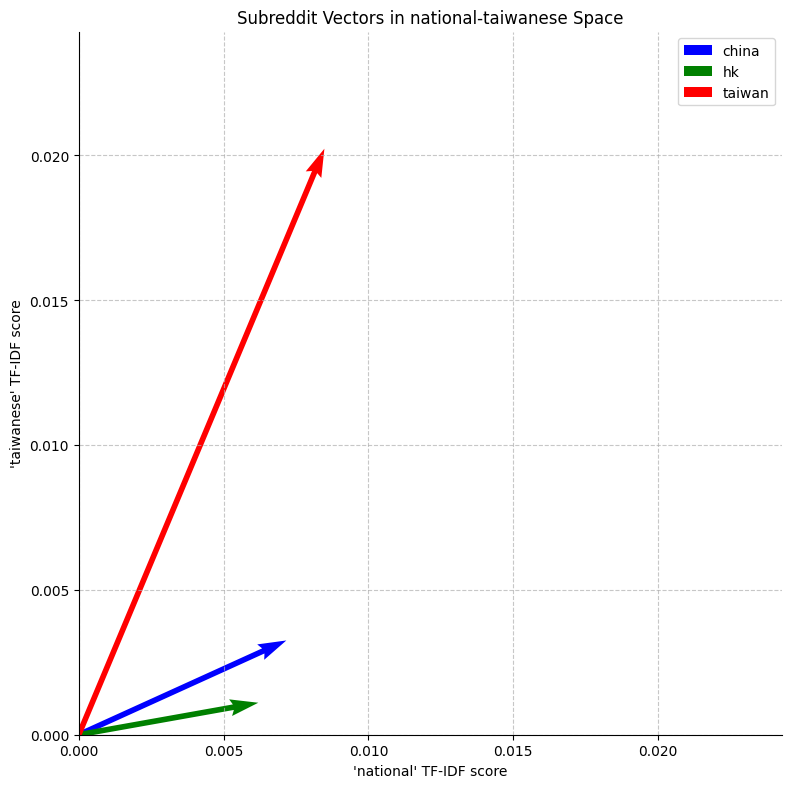

Distance between china and hk: 0.002358
Distance between china and taiwan: 0.017025
Distance between hk and taiwan: 0.019260

Angles between subreddit vectors:
china vs hk: 14.3°
china vs taiwan: 42.8°
hk vs taiwan: 57.2°


In [26]:
comparison('national', 'taiwanese')

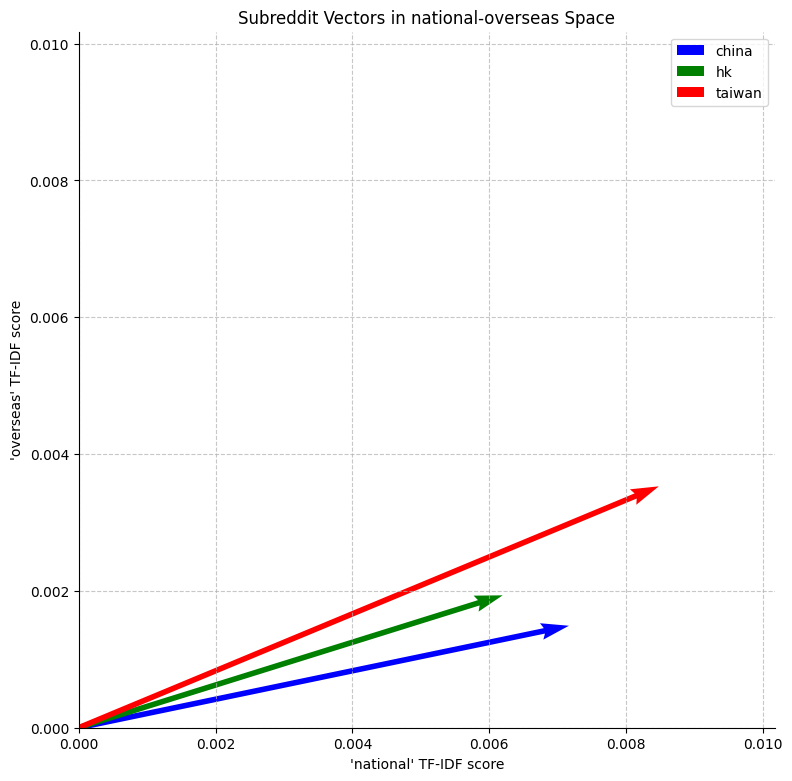

Distance between china and hk: 0.001065
Distance between china and taiwan: 0.002425
Distance between hk and taiwan: 0.002783

Angles between subreddit vectors:
china vs hk: 5.6°
china vs taiwan: 10.8°
hk vs taiwan: 5.3°


In [27]:
comparison('national', 'overseas')

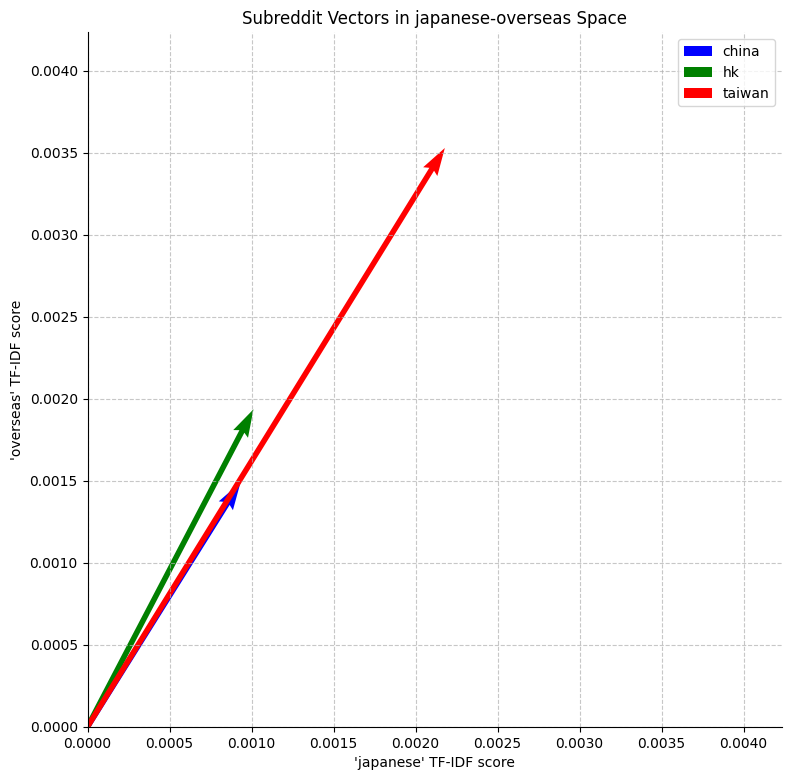

Distance between china and hk: 0.000452
Distance between china and taiwan: 0.002388
Distance between hk and taiwan: 0.001975

Angles between subreddit vectors:
china vs hk: 4.5°
china vs taiwan: 0.4°
hk vs taiwan: 4.1°


In [28]:
comparison('japanese', 'overseas')

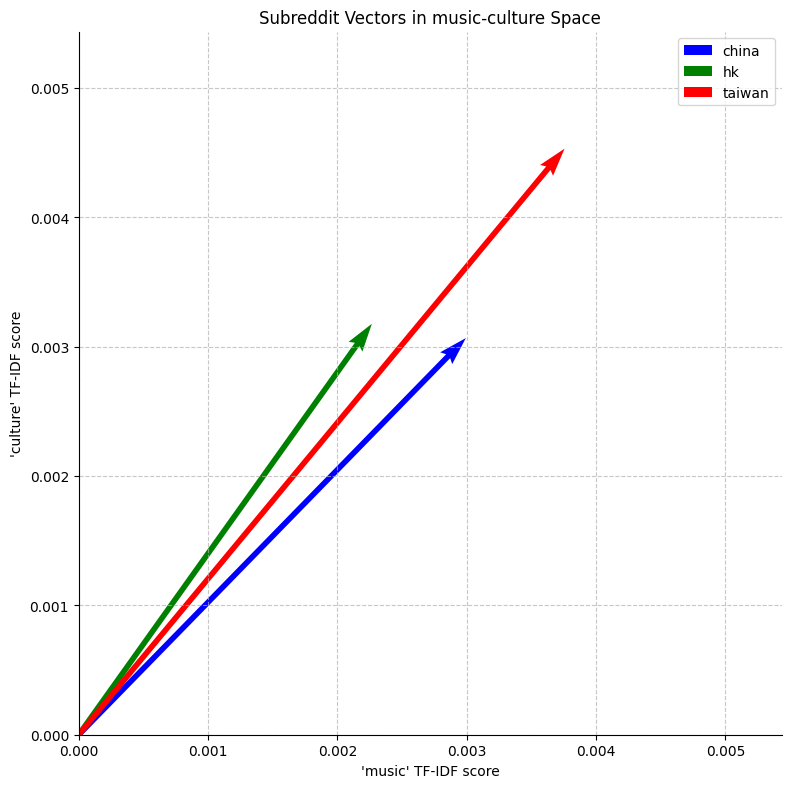

Distance between china and hk: 0.000735
Distance between china and taiwan: 0.001651
Distance between hk and taiwan: 0.002013

Angles between subreddit vectors:
china vs hk: 8.8°
china vs taiwan: 4.6°
hk vs taiwan: 4.2°


In [29]:
comparison('music', 'culture')

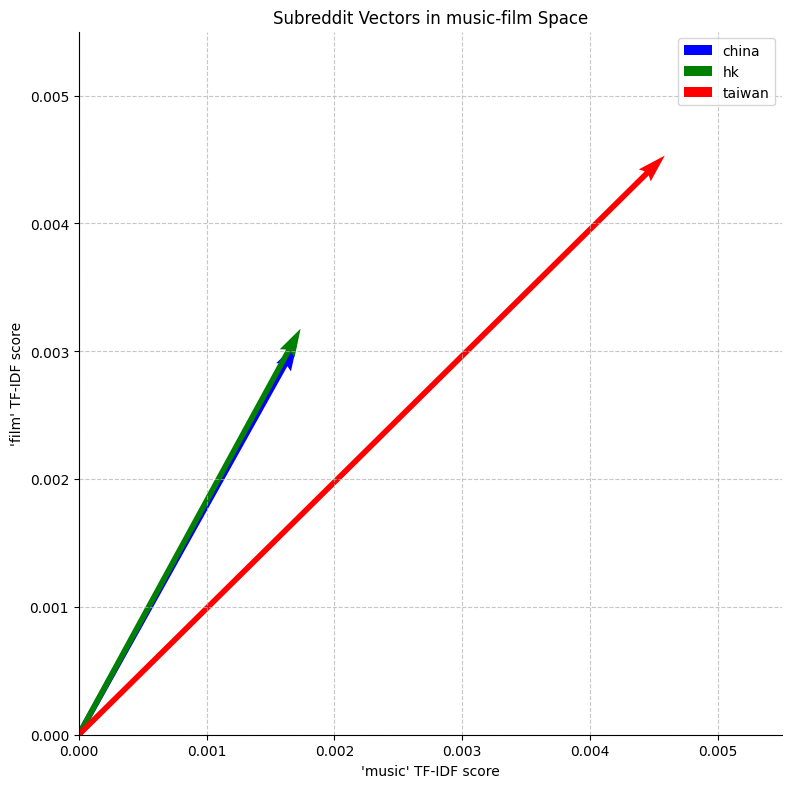

Distance between china and hk: 0.000113
Distance between china and taiwan: 0.003227
Distance between hk and taiwan: 0.003154

Angles between subreddit vectors:
china vs hk: 0.5°
china vs taiwan: 16.2°
hk vs taiwan: 16.7°


In [30]:
comparison('music', 'film')

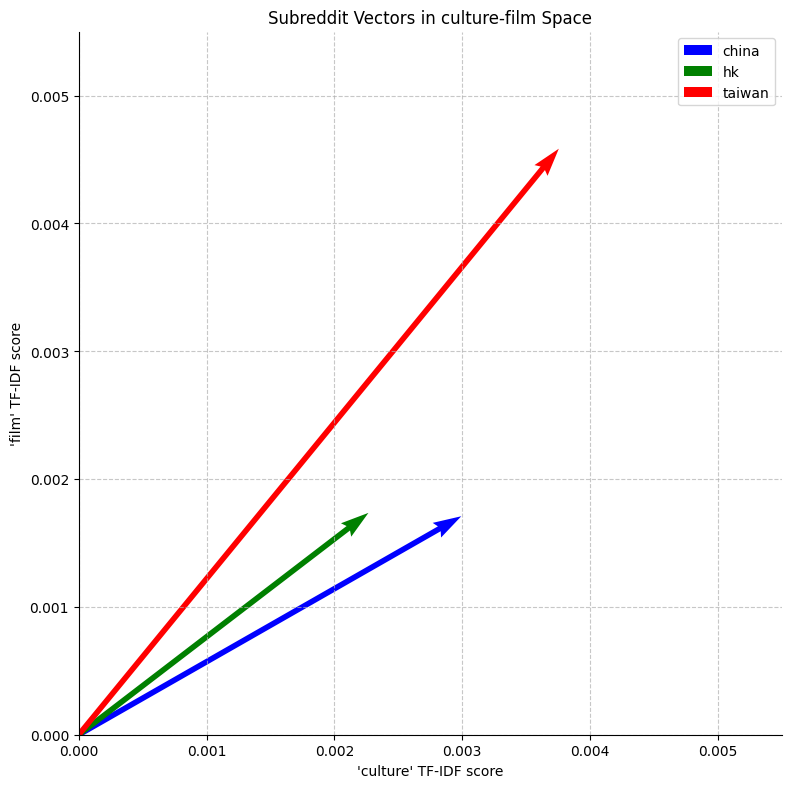

Distance between china and hk: 0.000727
Distance between china and taiwan: 0.002975
Distance between hk and taiwan: 0.003215

Angles between subreddit vectors:
china vs hk: 7.7°
china vs taiwan: 20.9°
hk vs taiwan: 13.2°


In [31]:
comparison('culture', 'film')